In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_recall_fscore_support, f1_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pickle

In [110]:
dataset = pd.read_csv("diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [111]:
columns= dataset.columns
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [112]:
mean_col=[]
#dataset.columns
columns= dataset.drop(["Outcome"],axis=1).columns

for i in columns:
    mean_col.append(round(dataset[i].mean(),2))

mean_of_columns = [f"Mean of {columns[i]} is {mean_col[i]}" for i in range(len(columns))]

print(mean_of_columns)


['Mean of Pregnancies is 3.85', 'Mean of Glucose is 120.89', 'Mean of BloodPressure is 69.11', 'Mean of SkinThickness is 20.54', 'Mean of Insulin is 79.8', 'Mean of BMI is 31.99', 'Mean of DiabetesPedigreeFunction is 0.47', 'Mean of Age is 33.24']


In [113]:
## glucose levels for two groups
## age level for ppl with diabetes (outcome ==1)


In [114]:
### Feature engineering
# 
# split the data
# handle 0
# balance data
# standardise
# log transformation

In [115]:
# Dividing dataset into independent and dependent Features
X = dataset.drop(['Outcome'], axis=1)
y = dataset['Outcome']


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.3, 
                                   shuffle=True)


In [117]:
# X_train['SkinThickness'] = X_train['SkinThickness'].replace(0, np.nan)
# X_train['Insulin'] =  X_train['Insulin'].replace(0, np.nan)
# X_train['BMI'] =  X_train['BMI'].replace(0, np.nan
# X_train['BloodPressure'] =  X_train['BloodPressure'].replace(0, np.nan)

In [118]:
# skin_thickness_median = X_train['SkinThickness'].median()
# insulin_mean = int(X_train['Insulin'].mean())
# bmi_mean = X_train['BMI'].mean().round(1)
# bp_mean = int(X_train['BloodPressure'].mean())
# 
# X_train['SkinThickness'] = X_train['SkinThickness'].fillna(skin_thickness_median)
# X_train['Insulin'] = X_train['Insulin'].fillna(insulin_mean)
# X_train['BMI'] = X_train['BMI'].fillna(bmi_mean)
# X_train['BloodPressure'] = X_train['BloodPressure'].fillna(bp_mean)


In [119]:
def remove_zeroes(X_train, X_test, strategy_dict):
    """
    Replaces 0s with NaN and fills NaNs using mean or median based on strategy_dict.

    Parameters:
    df : DataFrame
        The dataframe to modify (e.g., X_train).
    strategy_dict : dict
        Format: {'col1': 'mean', 'col2': 'median', ...}

    Returns:
    DataFrame with zeroes replaced and NaNs filled.
    """
    for col, strategy in strategy_dict.items():
        X_train[col] = X_train[col].replace(0, np.nan)
        X_test[col] = X_test[col].replace(0, np.nan)

        if strategy == 'mean':
            value = X_train[col].mean().round(1)
        elif strategy == 'median':
            value = X_train[col].median()
        else:
            raise ValueError(f"Invalid strategy '{strategy}' for column '{col}'. Use 'mean' or 'median'.")
      
        X_train[col] = X_train[col].fillna(value)

        X_test[col] = X_test[col].fillna(value)
    
    return X_train, X_test


In [120]:
strategy = {
    'SkinThickness': 'median',
    'Insulin': 'mean',
    'BMI': 'mean',
    'BloodPressure': 'median',
    'Glucose' : 'median'
}
remove_zeroes(X_train,  X_test , strategy)

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 387            8    105.0          100.0           36.0    155.3  43.3   
 58             0    146.0           82.0           29.0    155.3  40.5   
 692            2    121.0           70.0           32.0     95.0  39.1   
 637            2     94.0           76.0           18.0     66.0  31.6   
 435            0    141.0           72.0           29.0    155.3  42.4   
 ..           ...      ...            ...            ...      ...   ...   
 654            1    106.0           70.0           28.0    135.0  34.2   
 251            2    129.0           84.0           29.0    155.3  28.0   
 729            2     92.0           52.0           29.0    155.3  30.1   
 705            6     80.0           80.0           36.0    155.3  39.8   
 69             4    146.0           85.0           27.0    100.0  28.9   
 
      DiabetesPedigreeFunction  Age  
 387                     0.239   45  
 58                   

In [121]:
# #Adding Feature Insulin Resistance
#X_train['InsulinResistance'] = ((X_train['Insulin'] * X_train['Glucose'])/ 405).round(2)
#X_test['InsulinResistance'] = ((X_test['Insulin'] * X_test['Glucose'])/ 405).round(2)

In [122]:
(X_train['Glucose'] == 0).sum()

np.int64(0)

In [123]:
X_train.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.155411,0.233007,0.070064,0.075624,0.011340,0.005021,0.547317
Glucose,0.155411,1.000000,0.266033,0.169588,0.425690,0.230835,0.153224,0.296567
BloodPressure,0.233007,0.266033,1.000000,0.170972,0.138008,0.249309,0.002777,0.344666
SkinThickness,0.070064,0.169588,0.170972,1.000000,0.212423,0.552274,0.056963,0.106227
Insulin,0.075624,0.425690,0.138008,0.212423,1.000000,0.198305,0.120665,0.126499
BMI,0.011340,0.230835,0.249309,0.552274,0.198305,1.000000,0.126929,0.008537
DiabetesPedigreeFunction,0.005021,0.153224,0.002777,0.056963,0.120665,0.126929,1.000000,0.089701
Age,0.547317,0.296567,0.344666,0.106227,0.126499,0.008537,0.089701,1.000000


<Axes: >

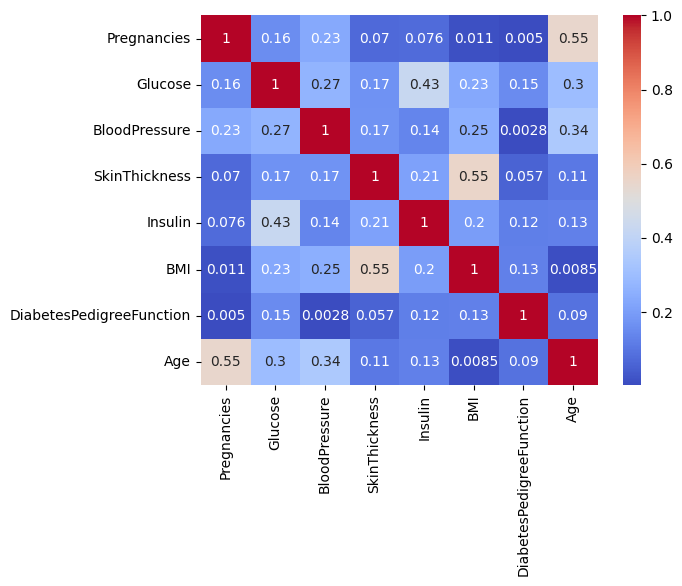

In [124]:
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')


In [125]:
#(X_test['Insulin'] ==0).sum()

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

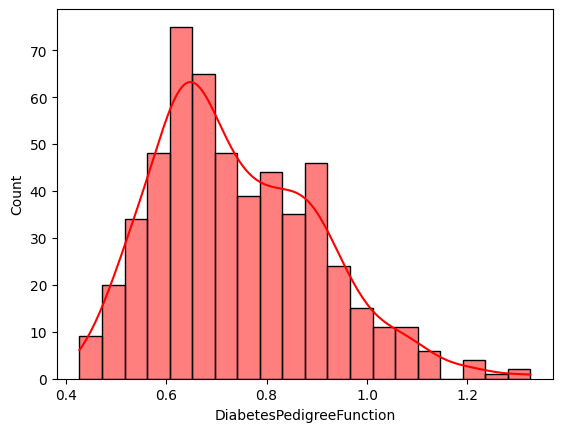

In [126]:
# Log Transformation
X_train['DiabetesPedigreeFunction']= np.cbrt(X_train['DiabetesPedigreeFunction'])
X_test['DiabetesPedigreeFunction']= np.cbrt(X_test['DiabetesPedigreeFunction'])

sns.histplot(data=X_train, x='DiabetesPedigreeFunction', kde=True, bins=20, color= "red")

<Axes: xlabel='Insulin', ylabel='Count'>

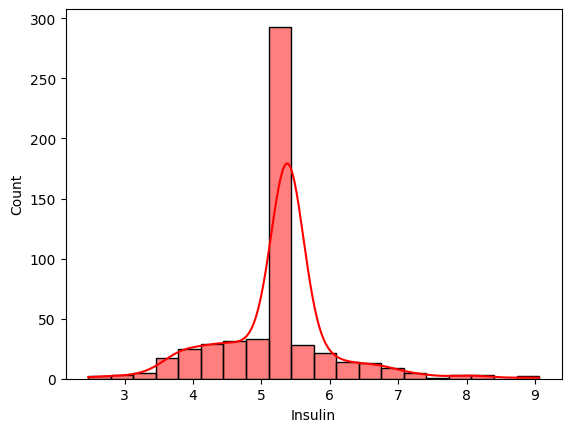

In [127]:
X_train['Insulin']= np.cbrt(X_train['Insulin'])
X_test['Insulin']= np.cbrt(X_test['Insulin'])

sns.histplot(data=X_train, x='Insulin', kde=True, bins=20, color= "red")


<Axes: xlabel='BMI', ylabel='Count'>

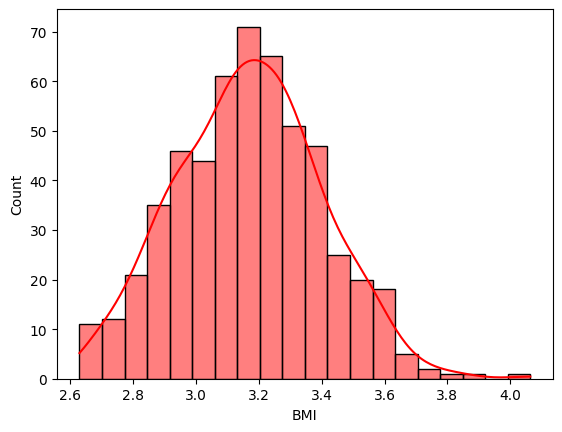

In [128]:
X_train['BMI']= np.cbrt(X_train['BMI'])
X_test['BMI']= np.cbrt(X_test['BMI'])

sns.histplot(data=X_train, x='BMI', kde=True, bins=20, color= "red")


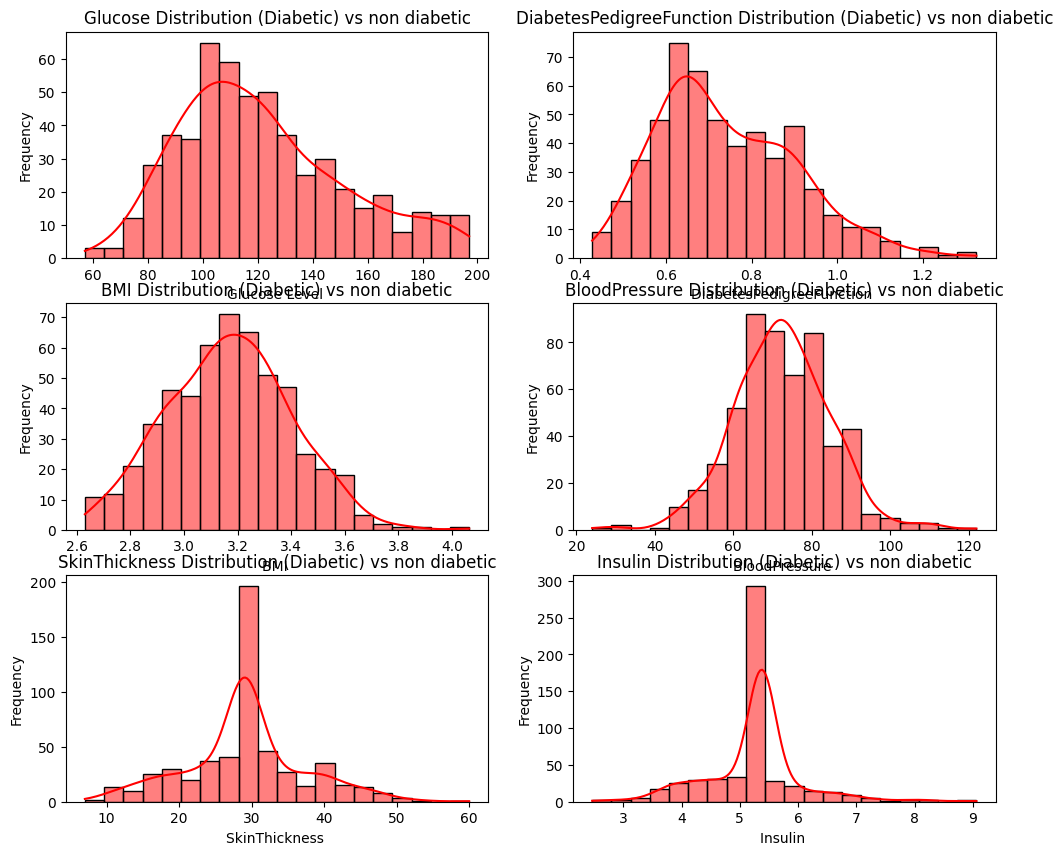

In [129]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 2 rows, 2 columns

sns.histplot(data=X_train, x='Glucose', kde=True, bins=20, color= "red",ax=axes[0, 0])
axes[0,0].set_title('Glucose Distribution (Diabetic) vs non diabetic')
axes[0,0].set_xlabel('Glucose Level ')
axes[0,0].set_ylabel('Frequency')


sns.histplot(data=X_train, x='DiabetesPedigreeFunction', kde=True, bins=20, color= "red", ax=axes[0, 1])
axes[0,1].set_title('DiabetesPedigreeFunction Distribution (Diabetic) vs non diabetic')
axes[0,1].set_xlabel('DiabetesPedigreeFunction ')
axes[0,1].set_ylabel('Frequency')

sns.histplot(data=X_train, x='BMI', kde=True, bins=20, color= "red", ax=axes[1,0])
axes[1,0].set_title('BMI Distribution (Diabetic) vs non diabetic')
axes[1,0].set_xlabel('BMI ')
axes[1,0].set_ylabel('Frequency')

sns.histplot(data=X_train, x='BloodPressure', kde=True, bins=20, color= "red", ax=axes[1,1])
axes[1,1].set_title('BloodPressure Distribution (Diabetic) vs non diabetic')
axes[1,1].set_xlabel('BloodPressure ')
axes[1,1].set_ylabel('Frequency')


sns.histplot(data=X_train, x='SkinThickness', kde=True, bins=20, color= "red", ax=axes[2,0])
axes[2,0].set_title('SkinThickness Distribution (Diabetic) vs non diabetic')
axes[2,0].set_xlabel('SkinThickness ')
axes[2,0].set_ylabel('Frequency')

sns.histplot(data=X_train, x='Insulin', kde=True, bins=20, color= "red", ax=axes[2,1])
axes[2,1].set_title('Insulin Distribution (Diabetic) vs non diabetic')
axes[2,1].set_xlabel('Insulin ')
axes[2,1].set_ylabel('Frequency')

plt.show()

In [130]:
scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)




In [131]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [132]:
# Instead of keeping it as NumPy array:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


In [133]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler, file)

In [134]:
## Balancing Data
smote = SMOTE(random_state=42)
X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)
#y_train = y_train.values.ravel()

In [135]:
with open('smote.pkl','wb') as file:
    pickle.dump(smote, file)

In [136]:
## Building models

## Logistic 
## hyperparameters tuning
## maybe manual way

In [137]:
model_1 = LogisticRegression()
model_1.fit(X_train_scaled, y_train)

LogisticRegression()

In [138]:
model_1_y_pred = model_1.predict(X_test_scaled)
acc = accuracy_score(y_test, model_1_y_pred) * 100


recall  = recall_score(y_test, model_1_y_pred) * 100
precision = precision_score(y_test,model_1_y_pred) * 100
f1= f1_score(y_test, model_1_y_pred) * 100


print(f"Logistic Regression model recall: {recall:.2f}%")
print(f"Logistic Regression model precision : {precision :.2f}%")
print(f"Logistic Regression model f1: {f1:.2f}%")
print(f"Logistic Regression model acc: {acc:.2f}%")

Logistic Regression model recall: 78.57%
Logistic Regression model precision : 62.86%
Logistic Regression model f1: 69.84%
Logistic Regression model acc: 75.32%


In [139]:
with open("models/model_1.pkl", "wb") as file:
    pickle.dump(model_1, file)


In [140]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
cm = confusion_matrix(y_test, model_1_y_pred)
print("Confusion Matrix:")
print(cm)

# Optional: more details
print("\nClassification Report:")
print(classification_report(y_test, model_1_y_pred))

Confusion Matrix:
[[108  39]
 [ 18  66]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       147
           1       0.63      0.79      0.70        84

    accuracy                           0.75       231
   macro avg       0.74      0.76      0.74       231
weighted avg       0.77      0.75      0.76       231



In [141]:
param_grid = [
    {'penalty': ['l2'], 'solver': ['lbfgs', 'newton-cg', 'sag'], 'max_iter': [100, 1000, 2500]},
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 1000, 2500]},
    {'penalty': ['l2'], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 1000, 2500]}
]


| Solver      | Supports `l1`? | Supports `l2`? | Notes                              |
| ----------- | -------------- | -------------- | ---------------------------------- |
| `liblinear` | ✅ Yes          | ✅ Yes          | Good for small datasets            |
| `lbfgs`     | ❌ No           | ✅ Yes          | Fast for large datasets            |
| `newton-cg` | ❌ No           | ✅ Yes          | Only `l2`                          |
| `sag`       | ❌ No           | ✅ Yes          | Only `l2`                          |
| `saga`      | ✅ Yes          | ✅ Yes          | Supports both, good for large data |


In [142]:

model_lr = LogisticRegression()
clf = GridSearchCV(model_lr,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)
clf

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'max_iter': [100, 1000, 2500], 'penalty': ['l2'],
                          'solver': ['lbfgs', 'newton-cg', 'sag']},
                         {'max_iter': [100, 1000, 2500], 'penalty': ['l1'],
                          'solver': ['liblinear', 'saga']},
                         {'max_iter': [100, 1000, 2500], 'penalty': ['l2'],
                          'solver': ['liblinear', 'saga']}],
             verbose=True)

In [143]:
best_clf = clf.fit(X_train_scaled,y_train)
best_clf.best_estimator_

Fitting 3 folds for each of 21 candidates, totalling 63 fits


LogisticRegression(penalty='l1', solver='liblinear')

In [144]:
print("Best Parameters:", best_clf.best_params_)
print("Best Score:", best_clf.best_score_)


Best Parameters: {'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.7421925712225027


In [145]:
best_lr = clf.best_estimator_
model_2_y_pred = best_lr.predict(X_test_scaled)

print(classification_report(y_test, model_2_y_pred))


              precision    recall  f1-score   support

           0       0.86      0.73      0.79       147
           1       0.62      0.79      0.69        84

    accuracy                           0.75       231
   macro avg       0.74      0.76      0.74       231
weighted avg       0.77      0.75      0.75       231



In [146]:
#acc = accuracy_score(y_test, lr.predict(X_test_scaled)) * 100

print(f'Accuracy - : {model_2_y_pred:.3f}')

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [ ]:

acc = accuracy_score(y_test, model_2_y_pred) * 100
recall  = recall_score(y_test, model_2_y_pred) * 100
precision = precision_score(y_test, model_2_y_pred) * 100
f1= f1_score(y_test, model_2_y_pred) * 100


print(f"Logistic Regression model recall: {recall:.2f}%")
print(f"Logistic Regression model precision : {precision :.2f}%")
print(f"Logistic Regression model f1: {f1:.2f}%")
print(f"Logistic Regression model acc: {acc:.2f}%")

Logistic Regression model recall: 78.57%
Logistic Regression model precision : 62.26%
Logistic Regression model f1: 69.47%
Logistic Regression model acc: 74.89%


In [ ]:
with open("models/model_2", "wb") as file:
    pickle.dump(model_lr,file)

In [ ]:
model_2 = LogisticRegression(max_iter= 100, penalty='l2', solver='lbfgs')
model_2.fit(X_train, y_train)

acc = accuracy_score(y_test, model_2.predict(X_test_scaled)) * 100


recall  = recall_score(y_test, model_2.predict(X_test_scaled)) * 100
precision = precision_score(y_test, model_2.predict(X_test_scaled)) * 100
f1= f1_score(y_test, model_2.predict(X_test_scaled)) * 100


print(f"Logistic Regression model recall: {recall:.2f}%")
print(f"Logistic Regression model precision : {precision :.2f}%")
print(f"Logistic Regression model f1: {f1:.2f}%")
print(f"Logistic Regression model acc: {acc:.2f}%")

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

feature_importance = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Coefficient': model_2.coef_[0]
})


In [ ]:
feature_importance

In [147]:
import numpy as np
from collections import Counter
def euclidean_distance(point1, point2): # point1 : [4,5] point2 : [1,2]
    # converting to array to add or subtract point 1 and point 2
    # array  addition and subtraction
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

In [ ]:
def knn_predict(training_data, training_labels, test_point, k):
    distances = []
    for i in range(len(training_data)):
        dist = euclidean_distance(test_point, training_data[i])
        #print(euclidean_distance(test_point, training_data[i]))
        distances.append((dist, training_labels[i])) # distances = [(dist, labels),()]
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]] # k =3, so getting 3 most closest training labels
    #print(Counter(k_nearest_labels).most_common(1))
    #d= Counter(k_nearest_labels)
    #print(d) # Counter({'A': 2, 'B': 1}) .mostcommon(1) =  ('A': 2)
    # mostcommon(1)[0][0] A
    return Counter(k_nearest_labels).most_common(1)[0][0] # most common gives 1 most common value 

In [149]:
training_data = [[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]]
training_labels = ['A', 'A', 'A', 'B', 'B']
test_point = [4, 5]
k = 3

In [ ]:
knn_predict(training_data, training_labels, test_point, k)

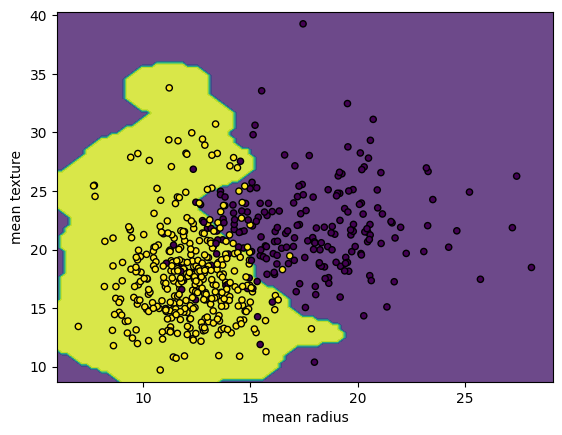

In [156]:
# Load the important packages
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

# Load the datasets
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X, y)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        
        alpha=0.8,
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], 
            c=y, 
            s=20, edgecolors="k")
plt.show()